## Compare human in vivo and ex vivo cell types using matchSCore

In [1]:
## Define Functions
matchSCore2 <- function(gene_cl.ref, gene_cl.obs, tissue, ylab, xlab){
  
  score=0
  lab.ref=seq(1:length(gene_cl.ref))
  lab.obs=seq(1:length(gene_cl.obs))
  anno.lab=vector()
  max_ji=vector()
  ji_mat=vector()
  
  for(i in 1:length(lab.ref)){
    len1=length(gene_cl.ref[[i]])
    JI=vector()
    for(ind in 1:length(lab.obs)){
      len2=length(gene_cl.obs[[ind]])
      I=length(intersect(gene_cl.ref[[i]],gene_cl.obs[[ind]]))
      J=I/(len1+len2-I)
      JI=append(JI,J,length(JI))
    }
    score=sum(score,max(JI))
    anno.lab = append(anno.lab,which(JI==max(JI)),after = length(anno.lab)) 
    max_ji = append(max_ji,max(JI),after = length(max_ji))
    ji_mat =rbind(ji_mat,JI)
  }
  score=score/length(gene_cl.ref)
  colnames(ji_mat)=names(gene_cl.obs)
  rownames(ji_mat)=names(gene_cl.ref)
  file_name=paste("summary_",tissue,".pdf",sep="")
  gg<-summary_ggplot(data=ji_mat,file_name,ylab,xlab)
  return(list(matchScore=score,labels=anno.lab,max_JI=max_ji,JI.mat=ji_mat,ggplot=gg))
  
}

summary_ggplot <- function(data,name_file,ylab,xlab){
  library(ggplot2)
  library(reshape2)      
  library(grid)          
  
  my_df <- data.frame(t(data),check.names = F,check.rows = F)
  my_df.melt <-  melt(cbind(x=1:nrow(my_df),my_df),id ="x")
  
  gg <- ggplot(my_df.melt, aes(x=factor(x),y=variable,fill=value)) + labs(x=xlab,y=ylab)+
    geom_tile(aes(fill = value)) + scale_x_discrete(lab=rownames(my_df), position = 'top')+ 
    theme(axis.text.x=element_text(angle=90,hjust = 0,size=16),
          axis.text.y = element_text(size=16),
          axis.title = element_text(size=16))+
    geom_text(aes(label = round(value, 2))) + 
    scale_fill_gradient(low = "white", high = "red",name="matchSCore\n") 
  
  
  return(gg)
}

### Read in marker tables

In [2]:
reference_dir <- '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo/01_data/marker_table/'

In [3]:
human_reference_all <- read.csv(paste0(reference_dir, '220111_CPC_IPF_reference_ALL_markers_table_celltype_OVERALL.csv'))
human_reference_healthy <- read.csv(paste0(reference_dir, '220111_CPC_IPF_reference_ALL_markers_table_celltype_HEALTHY.csv'))
human_reference_ipf <- read.csv(paste0(reference_dir, '220111_CPC_IPF_reference_ALL_markers_table_celltype_IPF.csv'))

In [4]:
pcls_dir <- '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_exvivo/01_data/'

In [5]:
human_pcls_all <- read.csv(paste0(pcls_dir,'220107_PCLS_human_ASK_joint_celltype_group_marker_table_OVERALL.csv'))
human_pcls_cc <- read.csv(paste0(pcls_dir,'220107_PCLS_human_ASK_joint_celltype_group_marker_table_CC.csv'))
human_pcls_fc <- read.csv(paste0(pcls_dir,'220107_PCLS_human_ASK_joint_celltype_group_marker_table_FC.csv'))

### Filtering marker tables

In [6]:
reference_genes_all <- human_reference_all[which(human_reference_all$pval_adj < 0.05 & human_reference_all$logfoldchange > 2), ]
reference_genes_all <- split(reference_genes_all$gene, reference_genes_all$cell_type)
reference_genes_healthy <- human_reference_healthy[which(human_reference_healthy$pval_adj < 0.05 & human_reference_healthy$logfoldchange > 2), ]
reference_genes_healthy <- split(reference_genes_healthy$gene, reference_genes_healthy$cell_type)
reference_genes_ipf <- human_reference_ipf[which(human_reference_ipf$pval_adj < 0.05 & human_reference_ipf$logfoldchange > 2), ]
reference_genes_ipf <- split(reference_genes_ipf$gene, reference_genes_ipf$cell_type)

In [7]:
pcls_genes_all <- human_pcls_all[which(human_pcls_all$pval_adj < 0.05 & human_pcls_all$logfoldchange > 2), ]
pcls_genes_all <- split(pcls_genes_all$gene, pcls_genes_all$cell_type)
pcls_genes_cc <- human_pcls_cc[which(human_pcls_cc$pval_adj < 0.05 & human_pcls_cc$logfoldchange > 2), ]
pcls_genes_cc <- split(pcls_genes_cc$gene, pcls_genes_cc$cell_type)
pcls_genes_fc <- human_pcls_fc[which(human_pcls_fc$pval_adj < 0.05 & human_pcls_fc$logfoldchange > 2), ]
pcls_genes_fc <- split(pcls_genes_fc$gene, pcls_genes_fc$cell_type)

### Apply matchSCore

In [8]:
options(repr.plot.width = 10, repr.plot.height = 7.5, repr.plot.res = 130)

#### Overall marker genes (IPF cell atlas vs hPCLS)

$matchScore
[1] 0.2336347

$labels
 [1] 14 13 12 11 10  8  9  8  7  6  5  4  3  2  1

$max_JI
 [1] 0.21200000 0.39267016 0.27682403 0.18388430 0.33231707 0.06854839
 [7] 0.22554348 0.33962264 0.19823789 0.23015873 0.12112676 0.22065728
[13] 0.22054381 0.22173913 0.26064736

$JI.mat
                    Airway Epithelium Alveolar Epithelium     B cells
vascular EC               0.010886470         0.006451613 0.000000000
T cells                   0.001739130         0.003649635 0.074358974
SMC/Pericytes             0.003016591         0.004716981 0.000000000
Plasma cells              0.009485095         0.007002801 0.069090909
NK cells                  0.000000000         0.003577818 0.051344743
Monocytes                 0.002336449         0.002487562 0.014925373
Mast cells                0.000000000         0.002079002 0.005730659
Macrophages               0.005917160         0.003067485 0.019493177
lymphatic EC              0.007363770         0.009202454 0.000000000
Fibroblasts      

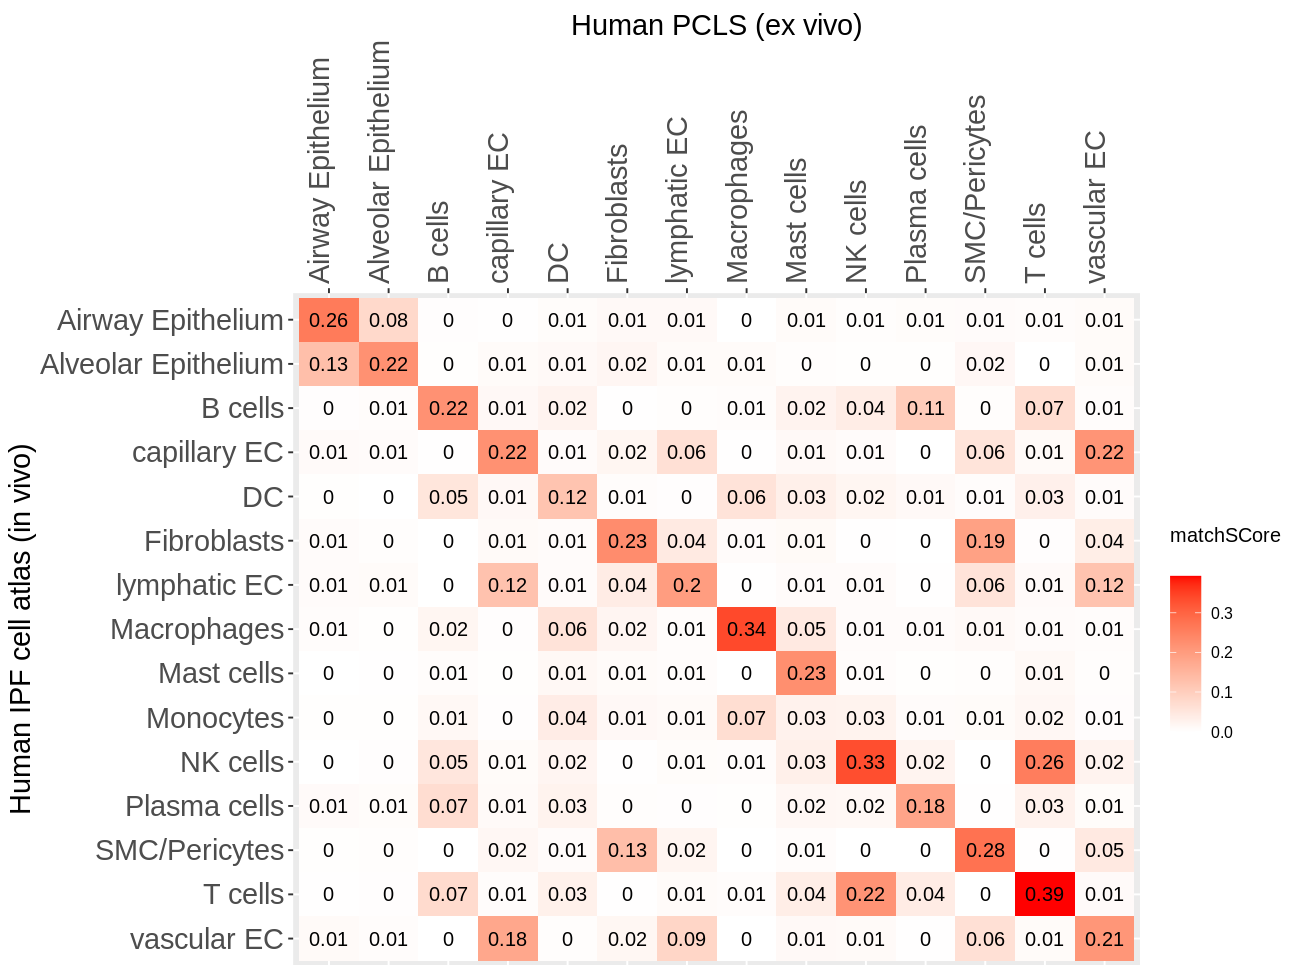

In [9]:
msc_all <- matchSCore2(gene_cl.ref = reference_genes_all[rev(1:length(reference_genes_all))], gene_cl.obs = pcls_genes_all,
            tissue = 'Lung', ylab = 'Human IPF cell atlas (in vivo)', xlab = 'Human PCLS (ex vivo)')
msc_all

In [10]:
write.csv(msc_all$JI.mat, '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo_exvivo_comparison/01_data/ASK_joint/210111_matchSCore_cell_type_group_OVERALL.csv')

#### Marker genes in healthy lungs vs CC treated hPCLS

$matchScore
[1] 0.2213189

$labels
 [1]  4 13 12  3 10  8  9  8  7  6  5  4  3  2  1

$max_JI
 [1] 0.18503937 0.35593220 0.29119639 0.09578544 0.29260450 0.11466165
 [7] 0.25609756 0.33728814 0.20518359 0.21923077 0.12951807 0.26114650
[13] 0.15777778 0.24390244 0.17441860

$JI.mat
                    Airway Epithelium Alveolar Epithelium     B cells
vascular EC               0.006504065         0.008051530 0.000000000
T cells                   0.005474453         0.003597122 0.085393258
SMC/Pericytes             0.006441224         0.003174603 0.001798561
Plasma cells              0.009463722         0.006220840 0.095785441
NK cells                  0.005555556         0.003649635 0.079545455
Monocytes                 0.002169197         0.002136752 0.018087855
Mast cells                0.000000000         0.002298851 0.014044944
Macrophages               0.003048780         0.007575758 0.024305556
lymphatic EC              0.004687500         0.004636785 0.001742160
Fibroblasts      

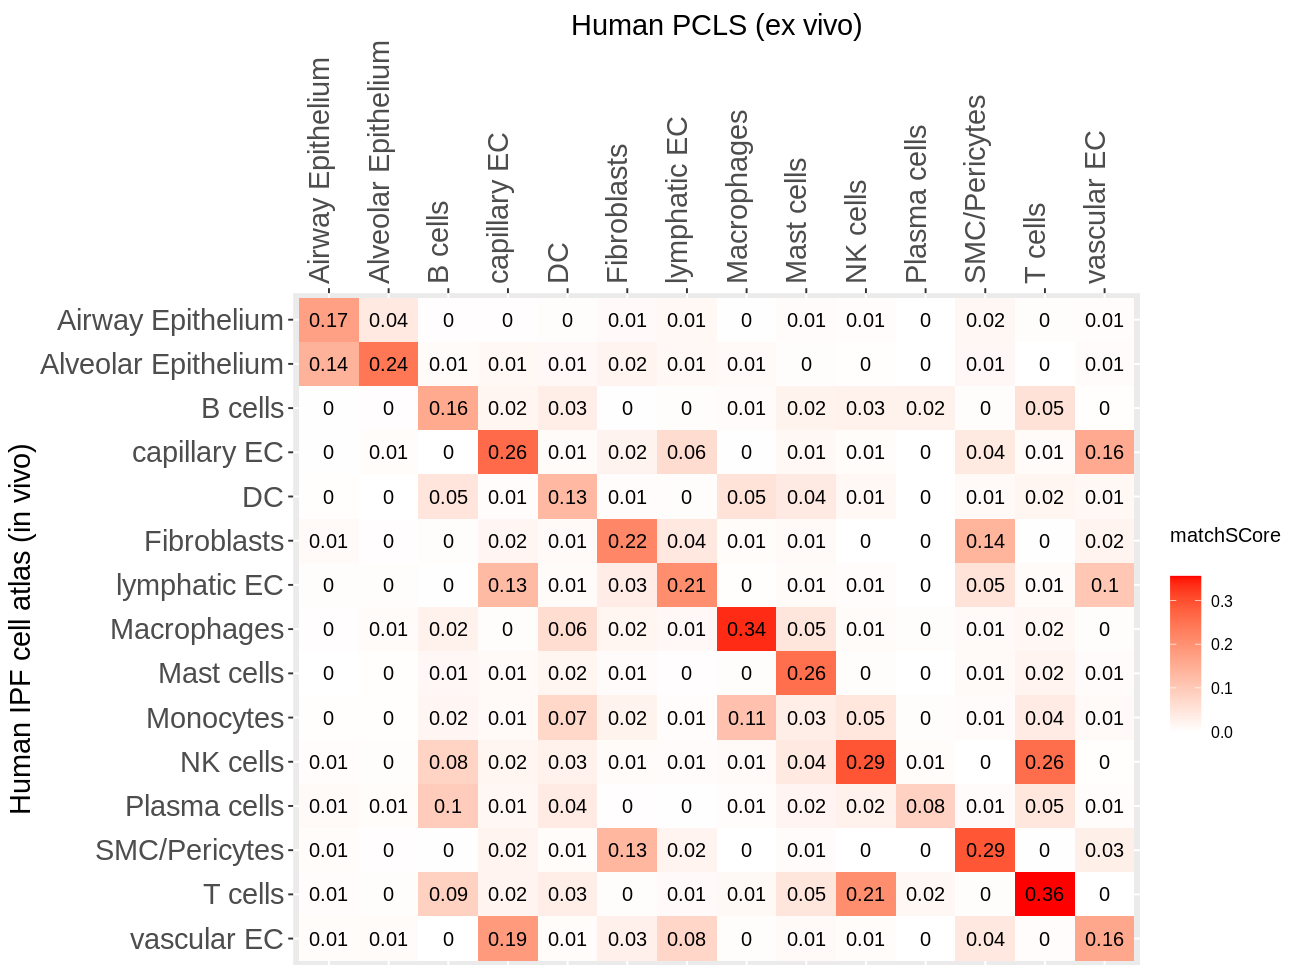

In [11]:
msc_healthy <- matchSCore2(gene_cl.ref = reference_genes_healthy[rev(1:length(reference_genes_healthy))], gene_cl.obs = pcls_genes_cc,
            tissue = 'Lung', ylab = 'Human IPF cell atlas (in vivo)', xlab = 'Human PCLS (ex vivo)')
msc_healthy

In [12]:
write.csv(msc_healthy$JI.mat, '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo_exvivo_comparison/01_data/ASK_joint/210111_matchSCore_cell_type_group_HEALTHY.csv')

#### Marker genes in IPF vs FC treated hPCLS

$matchScore
[1] 0.2275562

$labels
 [1]  4 13 12 11 10  8  9  8  7  6  5  4  3  2  1

$max_JI
 [1] 0.19758065 0.42091153 0.30232558 0.07672634 0.28213166 0.04329897
 [7] 0.21714286 0.35862069 0.21444695 0.21631879 0.11212121 0.24203822
[13] 0.20882353 0.27394209 0.24691358

$JI.mat
                    Airway Epithelium Alveolar Epithelium     B cells
vascular EC               0.008250825         0.008156607 0.000000000
T cells                   0.003853565         0.005714286 0.086330935
SMC/Pericytes             0.001633987         0.006493506 0.001838235
Plasma cells              0.004716981         0.006230530 0.049632353
NK cells                  0.001821494         0.005415162 0.068736142
Monocytes                 0.005361930         0.007915567 0.009868421
Mast cells                0.000000000         0.004464286 0.010781671
Macrophages               0.003053435         0.012195122 0.022569444
lymphatic EC              0.004838710         0.006389776 0.000000000
Fibroblasts      

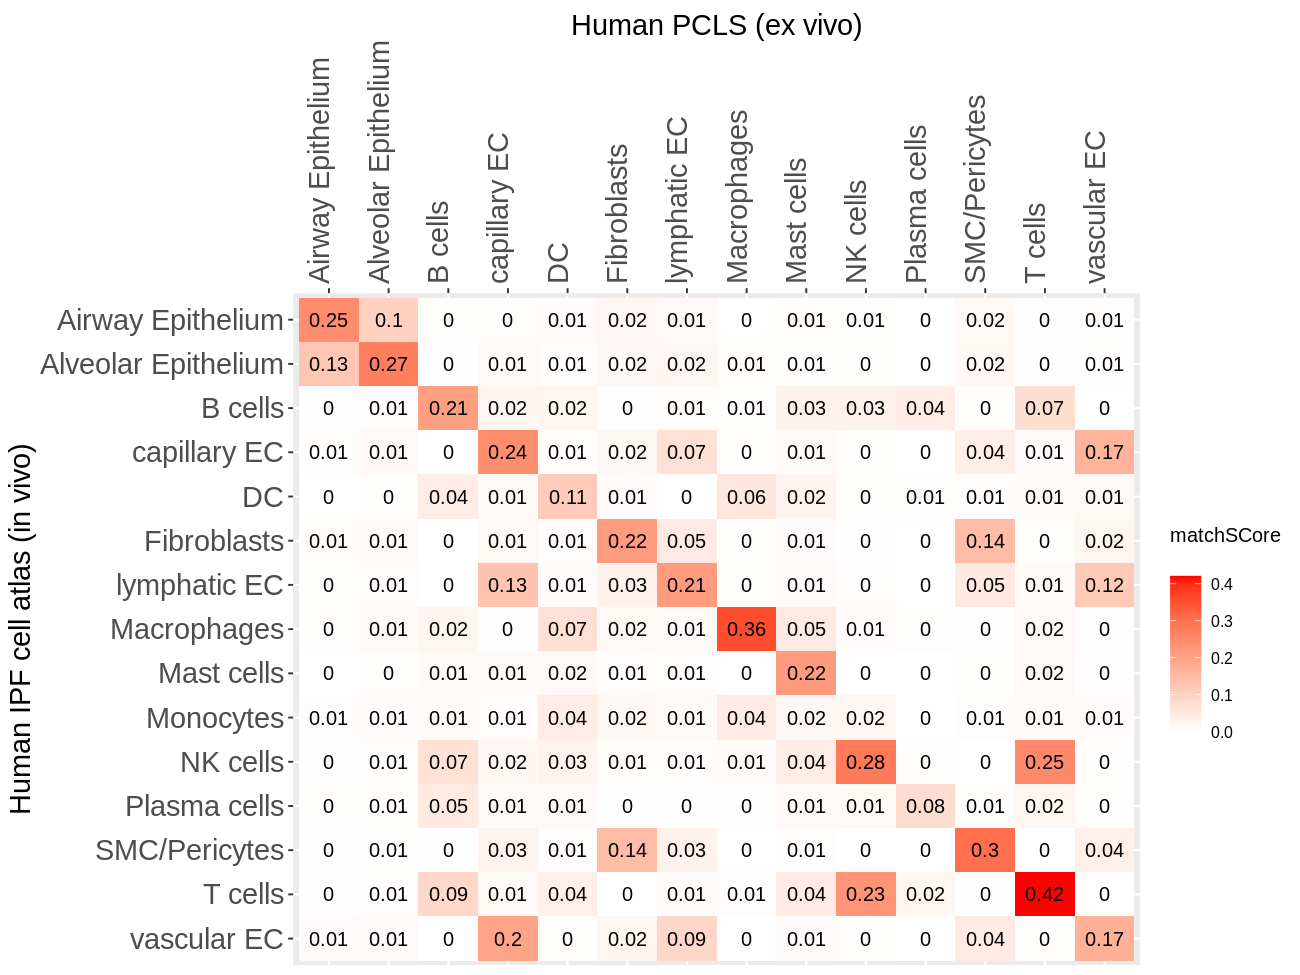

In [13]:
msc_ipf <- matchSCore2(gene_cl.ref = reference_genes_ipf[rev(1:length(reference_genes_ipf))], gene_cl.obs = pcls_genes_fc,
            tissue = 'Lung', ylab = 'Human IPF cell atlas (in vivo)', xlab = 'Human PCLS (ex vivo)')
msc_ipf

In [14]:
write.csv(msc_ipf$JI.mat, '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo_exvivo_comparison/01_data/ASK_joint/210111_matchSCore_cell_type_group_IPF.csv')